## Correlation Power Analysis - Key Recovery


In this part of the project, you will use the traces you collected in the first part of the project to complete the steps of the CPA attack and recover the key.

## Steps 3-4 Calculating Hypothetical Power

We attack our AES design during the first round at the output of the register FF1 (see the figure below). The equation for calculating the Hamming Distance (HD) is shown in the eqation below. We use HD model since it is suitable for CMOS technology and we know the the value of the intermediate at the attack point on two consecutive clock cycles.

![alt text](aes128.png "Logo Title Text 1")

The formula to calculated the hypothetical power is:

H(i,j) = HD(SBOX(CT(i) ), SBOX(kguess(j) xor PT(i+1) ))



### Excercise:
Run the following cell to load the libraries needed.

In [12]:
import os
import numpy as np
import fobos.traceset as traceset 
import fobos.cpa as cpa    #coded for CPA
#import fobos.postprocess as postprocess
import fobos.projmgr as projmgr
import fobos.powermodels.AESFirstLast as powermodel #code to calculate hypothetical power

In the folowing cell, specify the directory where the captured traces are stored.
The location is likely in the form attampt-i (e.g. attempt-1)



In [13]:
# Configure project directories ################################
PROJECT_NAME = "attempt-9" # the location is likely in the form attampt-i (e.g. attempt-1)
WORKSPACE = "./fobosworkspace/aes/capture"
pm = projmgr.ProjectManager()
pm.setWorkSpaceDir(WORKSPACE)
pm.setProjName(PROJECT_NAME)
projDir = pm.getProjDir()
analysisDir = pm.getAnalysisDir()
######
TRACES_FILE = os.path.join(projDir, 'powerTraces.npy')
PLAIN_FILE = os.path.join(projDir, 'plaintext.txt')
CIPHER_FILE = os.path.join(projDir, 'ciphertext.txt')
HYPO_FILE = os.path.join(projDir, "hypotheticalPower.npy")

Successfully created new capture directory at ./fobosworkspace/aes/capture/attempt-9/analysis/attempt-1


Note the directory above. All output files will be stored  in here.

After we set the directories and specify input files, we set CROP_START and CROP_END which selects the range of samples to be considered for the attack. Only that range will be used to speedup calculation.

The attack targets an intermediate value calculated at the first clock cycle of AES encryption.

1 - Looking at the trace you collected in the previous part, what is the range of samples for the first clock cycle (Hint: AES starts after loading data)?

In [16]:
CROP_START = 200
CROP_END = 250
NUM_TRACES = 10000

Now, lets load the traces by runnuing the following cell.

In [17]:
# load traces from file.
traceSet = traceset.TraceSet(traceNum=NUM_TRACES,
                            fileName=TRACES_FILE,
                            cropStart=CROP_START,
                            cropEnd=CROP_END)

measuredPower = traceSet.traces
print(f'The shape of the traces matrix is {measuredPower.shape}')

Loading raw traces from file: ./fobosworkspace/aes/capture/attempt-9/powerTraces.npy
Please wait ...
DEBUG: Module: analysis, Function: detectSampleSize():
----Detecting samples per trace
----It looks that the max number of samples in the first 10 traces is: 708
Loading done.
[[517. 514. 516. ... 428. 413. 397.]
 [496. 498. 495. ... 508. 491. 473.]
 [508. 508. 511. ... 511. 494. 474.]
 ...
 [485. 487. 487. ... 505. 490. 469.]
 [504. 502. 511. ... 514. 496. 481.]
 [473. 472. 474. ... 517. 501. 479.]]
The shape of the traces matrix is (10000, 50)


2- What is stored in the rows of the measuredPower matrix? Why it has these number of rows and columns? What do they represent?

Run the following cell to calculate the hypothetical power matrix. This uses the plaintext and ciphertext in the calculation as shown in the formula below.

H(i,j) = HD(SBOX(CT(i) ), SBOX(kguess(j) xor PT(i+1) ))

Please noted that this is applied one byte at a time.

In [18]:
hypotheticalPower = powermodel.getHypotheticalPower(PLAIN_FILE,
                                                    CIPHER_FILE,
                                                    NUM_TRACES)

plaintext=
0x51	0x72	0x01	0x87	0xc3	
0xb3	0x34	0xba	0x70	0xd6	
0x45	0x86	0x34	0x40	0xe2	
0xf3	0x89	0x19	0x1b	0xf9	
0x68	0x3d	0xf2	0xc5	0x8b	
0x22	0x90	0x22	0xab	0x24	
0xc2	0x01	0xfa	0x6e	0x44	
0xac	0xa9	0x6c	0xbd	0x2c	
0x1c	0xdb	0xb8	0xe1	0xe1	
0x86	0xc5	0x44	0xe8	0xc5	
ciphertext=
0x8e	0x6c	0x07	0x68	0x78	0x82	0x0f	0xe3	0xd9	0xfe	0xea	0x0f	0xc4	0x16	0xa7	0xa2	
0x50	0x61	0xd8	0xb9	0x3f	0x70	0x6a	0xb6	0xe3	0x78	0xb2	0x39	0xfa	0xe6	0xe0	0x9f	
0x78	0xf4	0xc3	0x0b	0x13	0x0a	0xae	0x4b	0x69	0x34	0x35	0x03	0x8a	0x82	0x87	0xfe	
0x28	0x22	0x63	0x3b	0xdc	0x42	0x29	0x5d	0x8b	0x5c	0x04	0x3e	0x4d	0xa0	0xc2	0xd6	
0xeb	0xf6	0xf8	0x87	0xb5	0xef	0x4b	0x56	0x98	0xd6	0xc9	0xc0	0xbc	0x61	0xd8	0x79	
0xfb	0xf8	0x97	0xa3	0xdd	0x48	0x79	0xe8	0xdc	0xa3	0xd3	0x06	0xd9	0x8c	0x08	0xa4	
0x9a	0xfb	0x5f	0x50	0xc9	0x61	0x91	0xa2	0x3e	0x1f	0x94	0x9f	0xde	0xc3	0xd9	0x0e	
0xd1	0x14	0x3e	0xc8	0x19	0x9d	0x82	0x68	0x6e	0xa5	0x08	0x02	0x4e	0xfe	0x11	0xb8	
0x44	0x48	0xfb	0x6c	0xb2	0xd7	0xb0	0x25	0x11	0x47	0xc4	0xf2	0x0c	0xa2

3- What is stored in the rows of the hypotheticalPower matrix? Why does it have these number of rows and columns? What do they represent?



Run the following cell to run the attack. It will take few minutes to finish. This will use the hypothetical power matrix (for eack key byte) and the traces collected from the hardware.

(10000, 50)
subkey number = 0, subkey value = 0x1, correlation = 0.07884442526866822, at sample = 28
    plotting correlation graph.
    Plotting MTD graph.
subkey number = 1, subkey value = 0x23, correlation = 0.10147297953258361, at sample = 28
    plotting correlation graph.
    Plotting MTD graph.
subkey number = 2, subkey value = 0x45, correlation = 0.09969592956124432, at sample = 27
    plotting correlation graph.
    Plotting MTD graph.
subkey number = 3, subkey value = 0x67, correlation = 0.09227486370432748, at sample = 27
    plotting correlation graph.
    Plotting MTD graph.
subkey number = 4, subkey value = 0x89, correlation = 0.08131608644248622, at sample = 26
    plotting correlation graph.
    Plotting MTD graph.
subkey number = 5, subkey value = 0xab, correlation = 0.0762965620345703, at sample = 27
    plotting correlation graph.
    Plotting MTD graph.
subkey number = 6, subkey value = 0xcd, correlation = 0.10123900886399727, at sample = 30
    plotting correlation

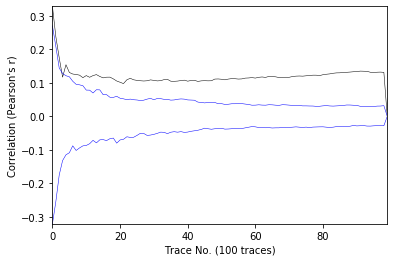

In [19]:
# Perform the attack
cpaAttacker = cpa.CPA()
C = cpaAttacker.doCPA(measuredPower=measuredPower,
                      hypotheticalPower=hypotheticalPower,
                      numTraces=NUM_TRACES,
                      analysisDir=analysisDir,
                      MTDStride= 100
                      )

4- What is the key that is found? Verify its correctness with any online AES calculator. Is it the correct key?


Click on File->Open and go to fobosworkspace/aes. Continue to browes to the analysis directory. You should find graphs generated by the CPA software. 

5- What are the two types of graphs you find? What is the purpoes of each of the two (include samples in your report)?

6- What is the minimum number of traces enough for full key recovery?

7- At which range of samples the you get the highst correclation (relative to the original trace. Remember the crop settings)